# Data Preparation

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [3]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

Dataset memiliki 3008 baris dan 33 fitur. Fitur yang digunakan untuk klasifikasi kenyamanan termal (*thermal comfort*) berdasarkan *Fanger's parameter* dan ASHRAE 55 :
- Indoor Air Termperature (Ti)
- Relative Humidity (RH)
- Temperature mean radiant (Tmr)
- Air Velocity (Va)
- Metabolism rate (met)
- Clothing insulation (clo)

Thermal Preference Vote (TP) merupakan skala yang menggambarkan tingkat kenyamanan dari *cold uncomfortable* - *comfort* - *hot uncomfortable* dengan nilai -3 sampai +3
![Thermal Preference Vote (kanan)](https://ars.els-cdn.com/content/image/1-s2.0-S2212095517301025-gr4.jpg)

In [18]:
data = dataset[['Ti','RH', 'Tmr', 'Va', 'met', 'clo', 'TP']]
data

,Ti,RH,Tmr,Va,met,clo,TP
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1
4,24.0,46.5,25.510728,0.1,1.10,0.40,0
...,...,...,...,...,...,...,...
3003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data di atas masih perlu dicek ada/tidaknya *null/NaN value* untuk selanjutnya dihilangkan apabila ada

In [19]:
data.isnull().sum()

Ti     400
RH     400
Tmr    400
Va     400
met    400
clo    400
TP     400
dtype: int64

In [20]:
data = data.dropna()
data

,Ti,RH,Tmr,Va,met,clo,TP
0,24.1,49.1,25.797614,0.1,1.25,0.980,-1
1,24.2,49.7,25.521541,0.1,1.00,0.860,-1
2,24.1,49.7,25.797614,0.1,1.00,0.850,-1
3,23.9,46.3,25.786732,0.1,1.00,0.930,-1
4,24.0,46.5,25.510728,0.1,1.10,0.400,0
...,...,...,...,...,...,...,...
2603,12.4,55.6,8.930533,0.1,1.10,0.987,-1
2604,13.8,55.5,14.198998,0.1,1.10,0.830,-1
2605,14.2,53.8,12.796541,0.1,1.10,1.150,0
2606,14.2,55.2,12.190274,0.1,1.10,0.920,-1


Selanjutnya dilakuakan pengecekan *unique feature* yaitu TP untuk melihat ada tidaknya nilai string yang tidak merepresentasikan *Thermal Preference Vote*

In [21]:
data.TP.unique()

array(['-1', '0', '1', '-2', '2', ' '], dtype=object)

In [22]:
data = data.drop(data.index[data['TP']==' '])
data

,Ti,RH,Tmr,Va,met,clo,TP
0,24.1,49.1,25.797614,0.1,1.25,0.980,-1
1,24.2,49.7,25.521541,0.1,1.00,0.860,-1
2,24.1,49.7,25.797614,0.1,1.00,0.850,-1
3,23.9,46.3,25.786732,0.1,1.00,0.930,-1
4,24.0,46.5,25.510728,0.1,1.10,0.400,0
...,...,...,...,...,...,...,...
2603,12.4,55.6,8.930533,0.1,1.10,0.987,-1
2604,13.8,55.5,14.198998,0.1,1.10,0.830,-1
2605,14.2,53.8,12.796541,0.1,1.10,1.150,0
2606,14.2,55.2,12.190274,0.1,1.10,0.920,-1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 2607
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ti      2607 non-null   float64
 1   RH      2607 non-null   float64
 2   Tmr     2607 non-null   float64
 3   Va      2607 non-null   float64
 4   met     2607 non-null   float64
 5   clo     2607 non-null   float64
 6   TP      2607 non-null   object 
dtypes: float64(6), object(1)
memory usage: 162.9+ KB


In [24]:
data.describe()

,Ti,RH,Tmr,Va,met,clo
count,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000
mean,20.627476,67.064440,21.395972,0.177342,1.115428,0.853515
std,4.918662,11.837453,5.983452,0.270712,0.121270,0.339383
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000
25%,16.600000,60.400000,16.494298,0.100000,1.100000,0.580000
50%,20.100000,69.600000,20.991648,0.100000,1.100000,0.790000
75%,23.700000,75.300000,24.632333,0.100000,1.100000,1.060000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.300000


In [25]:
data['TP'].value_counts()

0     1174
-1     977
1      322
-2      89
2       45
Name: TP, dtype: int64

TP memiliki 7 kelas. Namun, untuk menyederhanakan klasifikasi supaya tidak terjadi *underfiting* karena persebaran data terlalu sedikit dengan model yang terlalu rumit, maka kelas akan disederhanakan dari 7 kelas menjadi 3 kelas saja.

In [30]:
comfortLevel = {'-2':'cool uncomfortable',
                '-1':'cool uncomfortable',
                '0':'comfort',
                '1':'warm uncomfortable',
                '2':'warm uncomfortable'}

data['comfortLevel'] = data['TP'].map(comfortLevel)
data.head()

,Ti,RH,Tmr,Va,met,clo,TP,comfortLevel
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1,cool uncomfortable
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1,cool uncomfortable
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1,cool uncomfortable
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1,cool uncomfortable
4,24.0,46.5,25.510728,0.1,1.10,0.40,0,comfort


In [31]:
data['comfortLevel'].value_counts()

comfort               1174
cool uncomfortable    1066
warm uncomfortable     367
Name: comfortLevel, dtype: int64

# EDA

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='comfortLevel', ylabel='count'>

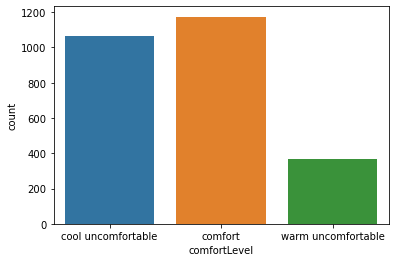

In [33]:
sns.countplot(x='comfortLevel', data=data)

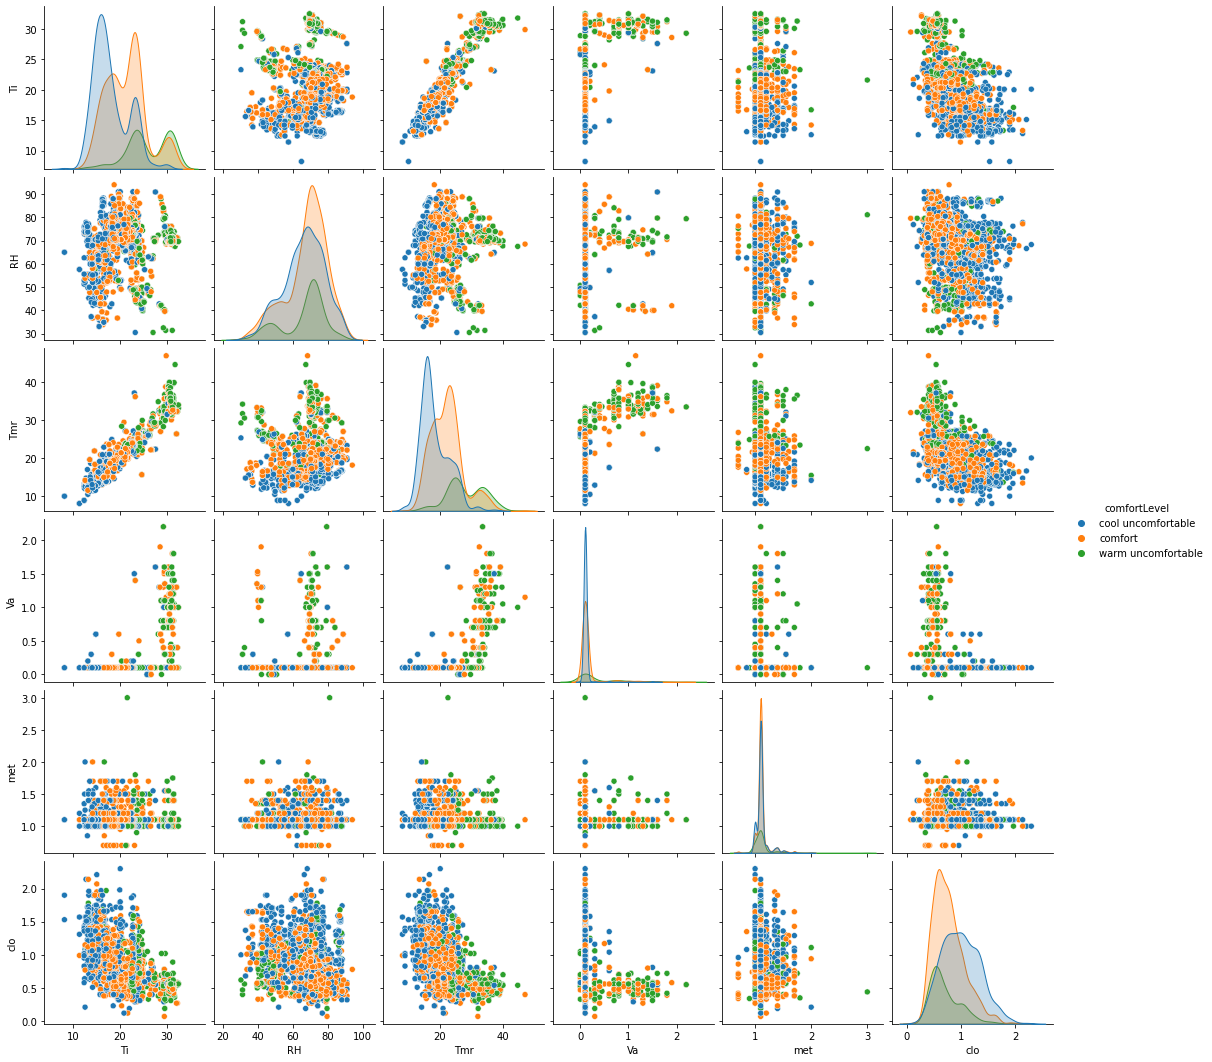

In [34]:
sns.pairplot(data=data, hue='comfortLevel')

<AxesSubplot:>

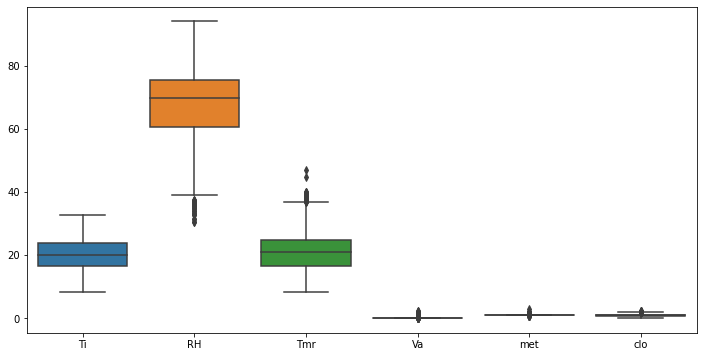

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)

Dari boxplot di atas, masih terdapat *outlier* pada fitur Tmr, Va, met, dan clo. Untuk mengatasi masalah ini, maka nantinya akan dilakukan standarisasi saat modeling

<AxesSubplot:>

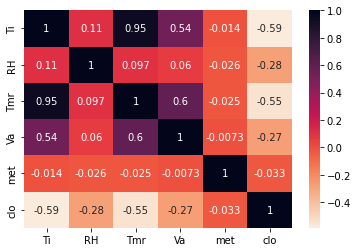

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='rocket_r')

# Classification 

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [34]:
# d1 = data[data["comfortLevel"]=="cool"].sample(500, random_state=1)
# d2 = data[data["comfortLevel"]=="comfort"].sample(500, random_state=1)
# d3 = data[data["comfortLevel"]=="warm"]
# data = pd.concat([d1,d2,d3])
# data.head()

###### Scaling Data

In [35]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

###### Splitting Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2085, 6) (522, 6)
(2085,) (522,)


###### Models Accuracy

In [44]:
modelsAccuracy = pd.DataFrame(columns=['Model', 'Accuracy'])

models = [('LogReg', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Random Forest', RandomForestClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Naive Bayes', GaussianNB())]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
#     cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.title(name)
    
    modelsAccuracy = modelsAccuracy.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)
    
    report = classification_report(y_test, y_pred)
    print(f'{name}\n{report}')
    
modelsAccuracy

LogReg
              precision    recall  f1-score   support

     comfort       0.59      0.61      0.60       233
        cool       0.68      0.69      0.69       232
        warm       0.48      0.37      0.42        57

    accuracy                           0.62       522
   macro avg       0.58      0.56      0.57       522
weighted avg       0.62      0.62      0.62       522

KNN
              precision    recall  f1-score   support

     comfort       0.59      0.68      0.63       233
        cool       0.68      0.62      0.65       232
        warm       0.42      0.33      0.37        57

    accuracy                           0.61       522
   macro avg       0.56      0.54      0.55       522
weighted avg       0.61      0.61      0.61       522

SVM
              precision    recall  f1-score   support

     comfort       0.59      0.67      0.63       233
        cool       0.71      0.65      0.68       232
        warm       0.46      0.37      0.41        57

    a

,Model,Accuracy
0,LogReg,0.620690
1,KNN,0.613027
2,SVM,0.626437
3,Random Forest,0.637931
4,Decision Tree,0.582375
5,Naive Bayes,0.580460


# Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
scoreCV = pd.DataFrame(columns=['Model', 'Cross Val Score'])

for name, model in models:
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f'{name} : {score}')
    
    scoreCV = scoreCV.append({'Model':name, 'Cross Val Score':score.mean()}, ignore_index=True)

scoreCV

LogReg : [0.32950192 0.24904215 0.55555556 0.85057471 0.77777778 0.98467433
 0.62452107 0.15769231 0.44230769 0.48846154]
KNN : [0.27586207 0.16475096 0.43295019 0.57854406 0.53256705 0.5440613
 0.38697318 0.17692308 0.35769231 0.46153846]
SVM : [0.25670498 0.18390805 0.47126437 0.79310345 0.7394636  0.87739464
 0.60536398 0.15384615 0.41538462 0.49615385]
Random Forest : [0.18390805 0.11494253 0.40613027 0.57088123 0.49808429 0.4789272
 0.3256705  0.12692308 0.30384615 0.5       ]
Decision Tree : [0.21072797 0.10727969 0.4137931  0.49808429 0.49425287 0.40229885
 0.27203065 0.22692308 0.31923077 0.49615385]
Naive Bayes : [0.35249042 0.24904215 0.5862069  0.88505747 0.63601533 0.99233716
 0.6091954  0.22307692 0.42307692 0.53076923]


,Model,Cross Val Score
0,LogReg,0.546011
1,KNN,0.391186
2,SVM,0.499259
3,Random Forest,0.350931
4,Decision Tree,0.344078
5,Naive Bayes,0.548727
